# **Life Expectancy Prediction - Project**

## **Section 1: Business Understanding**

**Objectives:**

The general purpose of the project assumes finding relations between economic indices of the countries and the life expectancy of citizens. For a better understanding of the foundation of analysis, the main goals were formulated into key questions.

_Criteria for business success:_ Answering all four questions below in a clear, understandable way.

_Criteria for success:_ Finding at least one feature correlated to the target greater than by 0,7. For the model, performance values: r2 greater than 0,8, RMSE being half of the target's standard deviation.

**Project path:**

_Project plan:_ Business understanding, Data understanding, Preparing data, Data modelling (using regression), Evaluation (answers to the questions).

_Required data resources:_ World Bank dataset from 2018 regarding 217 countries (222 rows, 15 columns), including various economic indices (features) and life expectancy values (target).

_Required technology and tools:_ Jupyter Notebook environment, Python 3.1+, Libraries: Pandas, Matplotlib, NumPy, Seaborn, Scikit-Learn.



### **Question 1: Do the economic indices correspond to the life expectancy?**
### **Question 2: How precisely can we estimate the life expectancy using the model's prediction?**
### **Question 3: How many features should we take under consideration to predict life expectancy?**
### **Question 4: How does the handling of missing values in a dataset affect the model's response?**

###

## **Section 2: Data Understanding**

Environment preparation

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

### Gather Data

Loading a dataset

In [10]:
df = pd.read_csv('worldbank.csv')

In [11]:
df.shape

(222, 15)

In [12]:
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD],GDP per capita (current US$) [NY.GDP.PCAP.CD],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Proportion of people living below 50 percent of median income (%) [SI.DST.50MD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL],People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS],"Population, total [SP.POP.TOTL]",GDP (current US$) [NY.GDP.MKTP.CD]
0,2018,YR2018,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,2018,YR2018,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,2018,YR2018,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,2018,YR2018,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,2018,YR2018,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


For a better visibility, shortening of columns names

In [18]:
df.rename(columns={
    'Country Name': 'Country',
    'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]': 'Health expenditure (% GDP)',
    'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]': 'Health expenditure per capita (US $)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per capita (US $)',
    'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]': 'Education expenditure (% GDP)',
    'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'Life expectancy (years)',
    'Proportion of people living below 50 percent of median income (%) [SI.DST.50MD]': 'People living below 50 percent of median income (%)',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'GDP growth (% annual)',
    'Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]': 'Human capital index (HCI)',
    'People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS]': 'Basic handwashing facilities - soap and water (% of population)',
    'Population, total [SP.POP.TOTL]': 'Population, total',
    'GDP (current US$) [NY.GDP.MKTP.CD]': 'GDP (US $)',
    }, inplace=True)

In [20]:
df.head()

,Time,Time Code,Country,Country Code,Health expenditure (% GDP),Health expenditure per capita (US $),GDP per capita (US $),Education expenditure (% GDP),Life expectancy (years),People living below 50 percent of median income (%),GDP growth (% annual),Human capital index (HCI),Basic handwashing facilities - soap and water (% of population),"Population, total",GDP (US $)
0,2018,YR2018,Afghanistan,AFG,14.20841885,71.33430481,491.337221382603,..,63.081,..,1.18922812944517,0.393489241600037,44.7775364052837,36743039.0,18053222687.4126
1,2018,YR2018,Albania,ALB,6.66844559,351.3012085,5365.48934672897,3.15294480323792,79.184,11.8,4.01934561695576,0.628666281700134,..,2866376.0,15379509891.7196
2,2018,YR2018,Algeria,DZA,6.38729763,266.46469116,4577.21029180491,5.81275129318237,76.066,..,1.40000000000002,0.531993925571442,84.3839771689143,42505035.0,194554483655.528
3,2018,YR2018,American Samoa,ASM,..,..,12552.0546868861,..,..,..,2.6711185308848,..,..,50908.0,639000000
4,2018,YR2018,Andorra,AND,7.37541723,3164.38842773,42819.7745797624,3.2467200756073,..,..,1.58876549046354,..,..,75162.0,3218419896.9641


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Time                                                             219 non-null    object 
 1   Time Code                                                        217 non-null    object 
 2   Country                                                          217 non-null    object 
 3   Country Code                                                     217 non-null    object 
 4   Health expenditure (% GDP)                                       217 non-null    object 
 5   Health expenditure per capita (US $)                             217 non-null    object 
 6   GDP per capita (US $)                                            217 non-null    object 
 7   Education expenditure (% GDP)               

Theoretically, no missing values. In practice, NaN is represented by '..'. Let's fix it

In [25]:
df.replace('..', np.nan, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Time                                                             219 non-null    object 
 1   Time Code                                                        217 non-null    object 
 2   Country                                                          217 non-null    object 
 3   Country Code                                                     217 non-null    object 
 4   Health expenditure (% GDP)                                       187 non-null    object 
 5   Health expenditure per capita (US $)                             187 non-null    object 
 6   GDP per capita (US $)                                            210 non-null    object 
 7   Education expenditure (% GDP)               

**Report for Data Understanding:**

The following dataset contains 222 rows and 15 columns, the total number of countries is 217. For a better visibility, columns names were shortened. 
Handling of missing values (renaming into NaN) was required for correct counting. After this procedure, it is visible that some of the columns are filled only in 30%. There is no point in working on them or trying to fill them as long as they are not crucial in the description of the economic situation. For instance, there is an interesting column regarding handwashing, but it describes only 93 countries. 
Most of the columns (apart from Population) are object type, what means they are not numeric. There are cells containig numbers, but represented in different datatype. There ale also fully text columns, which will be not necessary for this analysis.


## **Section 3: Preparing Data**

### Clean Data

For the start, we remove text and irrelevant columns, that are not necessary for numerical analysis. In case some data will be needed for further steps, we create a separate, shortened dataframe for analysis. 

In [33]:
dfu = df.drop(columns=[
    'Time', 
    'Time Code',
    'People living below 50 percent of median income (%)',
    'Basic handwashing facilities - soap and water (% of population)',
    'Country',
    'Country Code',
    'Health expenditure per capita (US $)',
    'GDP per capita (US $)',
    ])

In [35]:
dfu.head()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
0,14.20841885,NaN,63.081,1.18922812944517,0.393489241600037,36743039.0,18053222687.4126
1,6.66844559,3.15294480323792,79.184,4.01934561695576,0.628666281700134,2866376.0,15379509891.7196
2,6.38729763,5.81275129318237,76.066,1.40000000000002,0.531993925571442,42505035.0,194554483655.528
3,NaN,NaN,NaN,2.6711185308848,NaN,50908.0,639000000
4,7.37541723,3.2467200756073,NaN,1.58876549046354,NaN,75162.0,3218419896.9641


There are NaN values in our target. Let's remove them with affected rows.

In [38]:
dfu.dropna(subset='Life expectancy (years)', inplace=True)

Data is not numeric, what should be changed before further operation.

In [41]:
dfu = dfu.apply(pd.to_numeric, errors='coerce')

In [43]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     183 non-null    float64
 1   Education expenditure (% GDP)  163 non-null    float64
 2   Life expectancy (years)        209 non-null    float64
 3   GDP growth (% annual)          202 non-null    float64
 4   Human capital index (HCI)      166 non-null    float64
 5   Population, total              209 non-null    float64
 6   GDP (US $)                     202 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


NaN values should be removed or filled. We will check both methods, creating separate datasets. 

**df_fil** - filling blank spaces by median for a given column in order to save as much data as possible.

**df_del** - removing all the rows containing NaN and reducing the size of a dataset.


In [46]:
df_fil = dfu.fillna(dfu.median())
df_del = dfu.dropna(how='any')

### Assess Data

Taking a closer look into a dataset

In [50]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     209 non-null    float64
 1   Education expenditure (% GDP)  209 non-null    float64
 2   Life expectancy (years)        209 non-null    float64
 3   GDP growth (% annual)          209 non-null    float64
 4   Human capital index (HCI)      209 non-null    float64
 5   Population, total              209 non-null    float64
 6   GDP (US $)                     209 non-null    float64
dtypes: float64(7)
memory usage: 13.1 KB


In [52]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1 to 216
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Health expenditure (% GDP)     143 non-null    float64
 1   Education expenditure (% GDP)  143 non-null    float64
 2   Life expectancy (years)        143 non-null    float64
 3   GDP growth (% annual)          143 non-null    float64
 4   Human capital index (HCI)      143 non-null    float64
 5   Population, total              143 non-null    float64
 6   GDP (US $)                     143 non-null    float64
dtypes: float64(7)
memory usage: 8.9 KB


In [54]:
df_fil.describe()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
count,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02,2.090000e+02
mean,6.377202,4.327001,72.719711,3.105282,0.563922,3.671019e+07,4.122362e+11
std,2.702349,1.601661,7.583850,2.704998,0.130942,1.407709e+08,1.808840e+12
min,1.897636,0.419998,52.554000,-7.999995,0.299029,1.075100e+04,4.801526e+07
25%,4.530000,3.453570,66.855000,1.667811,0.466417,1.270737e+06,7.878760e+09
50%,6.066301,4.243570,73.806000,3.162405,0.557999,6.982604e+06,3.301928e+10
75%,7.625414,4.934560,78.662000,4.795060,0.629312,2.593115e+07,1.945545e+11
max,18.640678,15.377000,84.928000,8.776224,0.887084,1.402760e+09,2.065652e+13


In [56]:
df_del.describe()

,Health expenditure (% GDP),Education expenditure (% GDP),Life expectancy (years),GDP growth (% annual),Human capital index (HCI),"Population, total",GDP (US $)
count,143.000000,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,6.443204,4.365551,72.706015,3.438979,0.575035,4.891060e+07,5.759628e+11
std,2.641871,1.844453,7.653465,2.463353,0.146624,1.684340e+08,2.167759e+12
min,1.897636,0.419998,52.554000,-3.363688,0.299029,4.700800e+04,2.335147e+08
25%,4.284983,3.152431,66.508500,1.883946,0.454720,3.297594e+06,1.475480e+10
50%,6.310000,4.179490,73.802000,3.479439,0.578217,1.017521e+07,5.490152e+10
75%,8.284938,5.233260,78.650512,4.974670,0.706778,3.159737e+07,3.341023e+11
max,16.629644,15.377000,84.210976,8.776224,0.887084,1.402760e+09,2.065652e+13


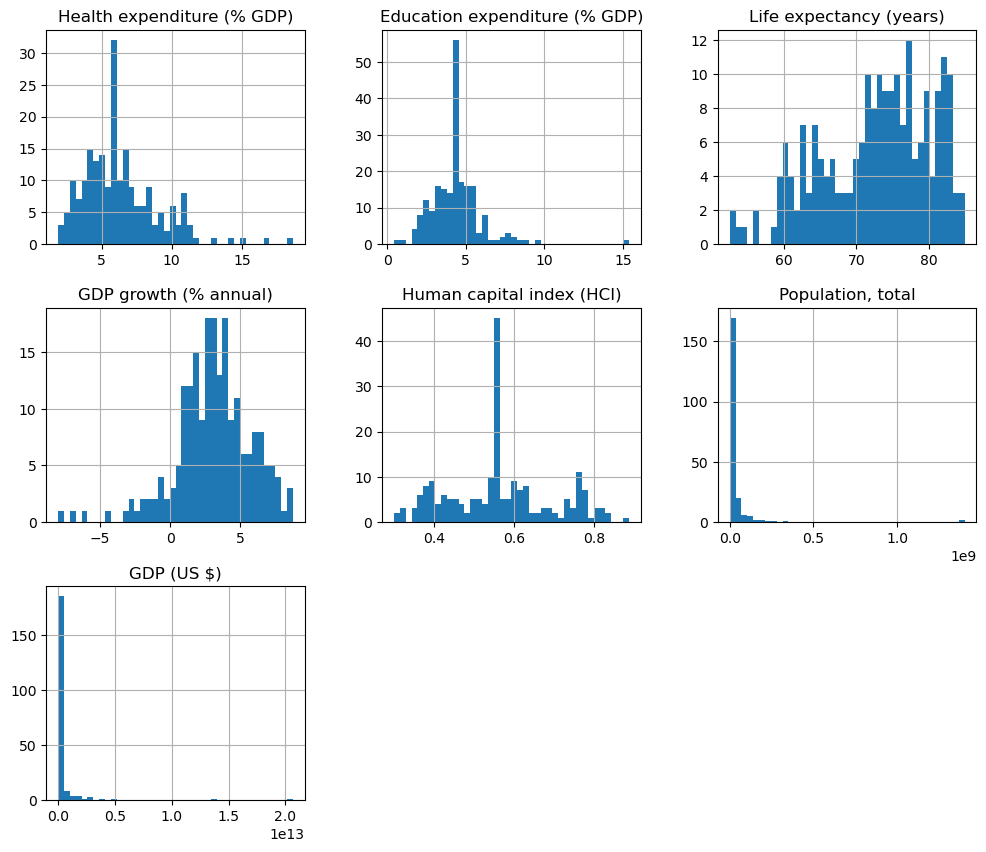

In [58]:
df_fil.hist(bins=40, figsize=(12,10))
plt.show()

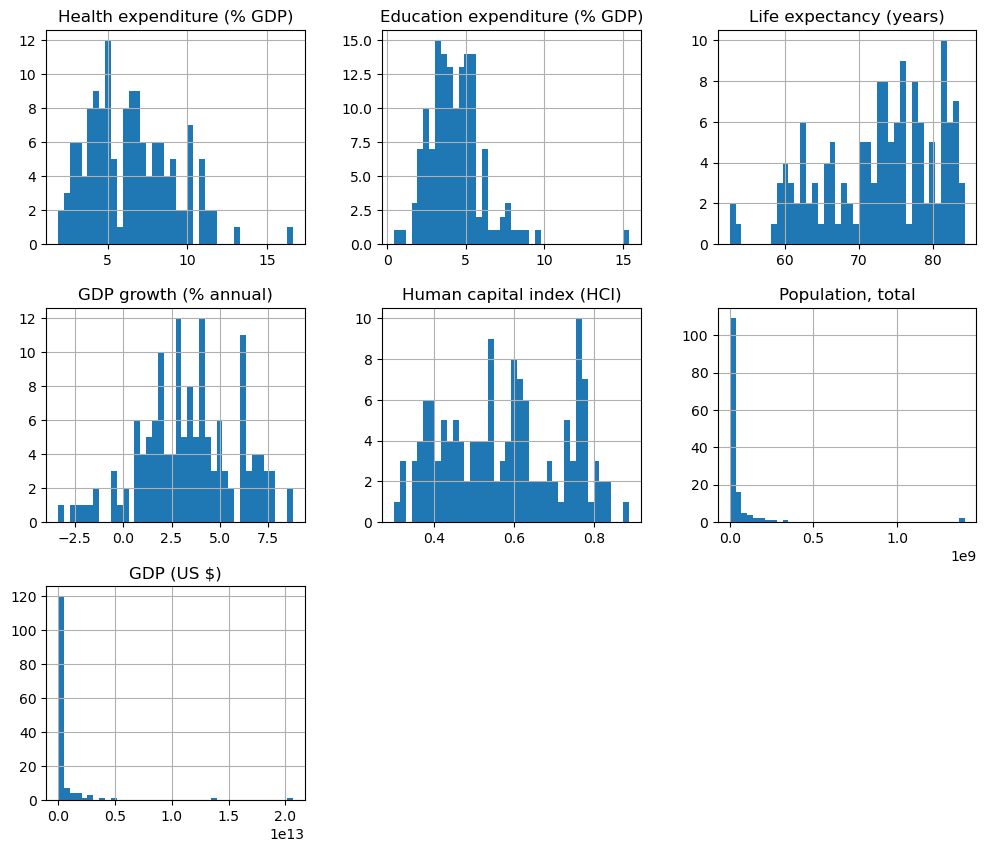

In [59]:
df_del.hist(bins=40, figsize=(12,10))
plt.show()

Checking correlations in datasets

In [63]:
corr_fil = df_fil.corr()
corr_fil['Life expectancy (years)'].sort_values(ascending=False)

Life expectancy (years)          1.000000
Human capital index (HCI)        0.805047
Health expenditure (% GDP)       0.231754
GDP (US $)                       0.173857
Education expenditure (% GDP)    0.112895
Population, total               -0.000316
GDP growth (% annual)           -0.102616
Name: Life expectancy (years), dtype: float64

In [65]:
corr_del = df_del.corr()
corr_del['Life expectancy (years)'].sort_values(ascending=False)

Life expectancy (years)          1.000000
Human capital index (HCI)        0.891549
Health expenditure (% GDP)       0.446059
GDP (US $)                       0.205108
Education expenditure (% GDP)    0.157771
Population, total                0.013356
GDP growth (% annual)           -0.125979
Name: Life expectancy (years), dtype: float64

**Report for Preparing Data:**

The two datasets that we prepared differ in size, a number of rows is: 209 and 143 respectively. There are no significant differences for most of the data parameters.
Histograms show a close-to-normal distribution for a few features. In some of them (population or GDP) differences between border values are so high that the axis scale cannot reflect those differences visibly. It is also proven by the standard deviation and mean values shown in the table.
The correlation between features and target is represented by higher numbers for the dataset df_del (with removed rows). In general, values are higher and there are more positive correlations.

## **Section 4: Data Modeling**

Modeling modules preparation

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### Model Data

We create multiple linear regression models for two datasets.

**Selection of the label and features - df_fil dataset**

In [75]:
X_fil = df_fil.drop('Life expectancy (years)', axis=1)
y_fil = df_fil['Life expectancy (years)']

Split of data in ratio 0.8/0.2 for training and test

In [78]:
X_fil_train, X_fil_test, y_fil_train, y_fil_test = train_test_split(X_fil, y_fil, test_size=0.2, random_state=0)

Training a regression model

In [81]:
linear_model_fil = LinearRegression()
linear_model_fil.fit(X_fil_train, y_fil_train) 

LinearRegression()

Preparation of predictions

In [84]:
predictions_train_fil = linear_model_fil.predict(X_fil_train)
predictions_test_fil = linear_model_fil.predict(X_fil_test)
print(predictions_test_fil.round(0))

[78. 68. 83. 76. 71. 81. 76. 75. 82. 62. 80. 72. 69. 70. 71. 75. 73. 77.
 64. 64. 80. 72. 72. 71. 72. 84. 73. 68. 65. 75. 67. 83. 60. 79. 65. 71.
 65. 61. 82. 72. 76. 75.]


Actual values for a comparison. 

In [87]:
print(y_fil_test.values.round(0))

[80. 73. 82. 77. 71. 83. 76. 74. 83. 66. 78. 68. 73. 76. 63. 76. 75. 80.
 63. 60. 83. 74. 76. 73. 72. 82. 70. 71. 68. 79. 73. 81. 62. 82. 60. 74.
 66. 59. 82. 80. 78. 77.]


Relative errors of prediction (by %)

In [90]:
relative_errors_fil = np.abs(predictions_test_fil - y_fil_test) / y_fil_test * 100
print(relative_errors_fil.values.round(2))

[ 2.85  6.04  1.68  1.54  0.43  2.74  0.09  1.09  1.29  5.85  2.83  5.56
  5.46  7.72 13.81  1.94  2.    4.12  1.93  6.72  3.55  2.4   4.8   1.53
  0.1   2.19  3.82  4.26  3.96  4.6   7.43  1.51  3.8   3.86  8.55  3.99
  0.87  2.67  0.19  9.93  2.32  3.2 ]


We define a function for model performance validation

In [93]:
def score(X_train, y_train, X_test, y_test, predictions_train, predictions_test, linear_model):
    '''
    This function returns an evaluation of the model by calculation of r2 and rmse parameters for train and test set.
    
    Input:
    X_train, y_train, X_test, y_test, predictions_train, predictions_test, linear_model
    Those arguments are: labels for test and train sets of features and target, prediction sets (train and target) and an object of LinearRegression class.
    
    Output:
    train_score, test_score, rmse_train, rmse_test
    Print score values for r2 and rmse to the console. Return a tuple of score values of r2 and rmse for the train and test set.
    
    '''
    train_score = linear_model.score(X_train, y_train)
    test_score = linear_model.score(X_test, y_test)
    rmse_train = root_mean_squared_error(y_train, predictions_train)
    rmse_test = root_mean_squared_error(y_test, predictions_test)
    names = [f'r2 train: {train_score}', f'r2 test: {test_score}', f'rmse train: {rmse_train}', f'rmse test: {rmse_test}']
    print(*names, sep='\n')
    values = (train_score, test_score, rmse_train, rmse_test)
    return values
    

Evaluation of the model based on df_fil

In [96]:
values_fil = score(X_fil_train, y_fil_train, X_fil_test, y_fil_test, predictions_train_fil, predictions_test_fil, linear_model_fil)

r2 train: 0.6289387633205068
r2 test: 0.7680746393126646
rmse train: 4.70424427291162
rmse test: 3.2767080074601176


**Selection of the label and features - df_del dataset**

In [99]:
X_del = df_del.drop('Life expectancy (years)', axis=1)
y_del = df_del['Life expectancy (years)']

Split of data in ratio 0.8/0.2 for training and test

In [102]:
X_del_train, X_del_test, y_del_train, y_del_test = train_test_split(X_del, y_del, test_size=0.2, random_state=0)

Training a regression model

In [105]:
linear_model_del = LinearRegression()
linear_model_del.fit(X_del_train, y_del_train) 

LinearRegression()

Preparation of predictions

In [108]:
predictions_train_del = linear_model_del.predict(X_del_train)
predictions_test_del = linear_model_del.predict(X_del_test)
print(predictions_test_del.round(0))

[79. 80. 77. 75. 60. 82. 63. 63. 65. 71. 60. 64. 75. 82. 77. 69. 73. 73.
 73. 76. 81. 69. 71. 74. 72. 64. 63. 73. 66.]


Actual values for a comparison.

In [111]:
print(y_del_test.values.round(0))

[82. 83. 75. 76. 53. 82. 66. 63. 60. 74. 62. 67. 73. 83. 74. 73. 70. 71.
 76. 78. 73. 74. 72. 79. 76. 62. 60. 75. 64.]


Relative errors of prediction (by %). 

In [114]:
relative_errors_del = np.abs(predictions_test_del - y_del_test) / y_del_test * 100
print(relative_errors_del.values.round(2))

[ 3.92  3.64  3.09  2.2  13.78  0.42  4.93  0.97  8.54  4.    3.44  4.46
  3.39  0.82  4.42  6.09  3.33  1.64  2.98  2.17 11.34  7.05  0.93  6.86
  5.3   4.56  4.67  2.99  3.  ]


Evaluation of the model based on df_del

In [117]:
values_del = score(X_del_train, y_del_train, X_del_test, y_del_test, predictions_train_del, predictions_test_del, linear_model_del)

r2 train: 0.8018288494903624
r2 test: 0.784384179021284
rmse train: 3.388756995879414
rmse test: 3.519462965949931


Model based on df_del shows better accuracy. Therefore, this dataset is chosen for further analysis.

**Training a simplified model with one feature (the first in correlation list).**

In [121]:
X_train_HCI = X_del_train[['Human capital index (HCI)']]
X_test_HCI = X_del_test[['Human capital index (HCI)']]
linear_model_simp1 = LinearRegression()
linear_model_simp1.fit(X_train_HCI, y_del_train)

LinearRegression()

Preparation of predictions

In [124]:
predictions_train_simp1 = linear_model_simp1.predict(X_train_HCI)
predictions_test_simp1 = linear_model_simp1.predict(X_test_HCI)

Evaluation of the model

In [127]:
values_simp1 = score(X_train_HCI, y_del_train, X_test_HCI, y_del_test, predictions_train_simp1, predictions_test_simp1, linear_model_simp1)

r2 train: 0.7976652335630409
r2 test: 0.7778683138354765
rmse train: 3.424171182710538
rmse test: 3.5722458805731145


**Training a simplified model with one feature (the second in correlation list) - different scenario.**

In [130]:
X_train_Hexp = X_del_train[['Health expenditure (% GDP)']]
X_test_Hexp = X_del_test[['Health expenditure (% GDP)']]
linear_model_simp2 = LinearRegression()
linear_model_simp2.fit(X_train_Hexp, y_del_train)

LinearRegression()

Preparation of predictions

In [133]:
predictions_train_simp2 = linear_model_simp2.predict(X_train_Hexp)
predictions_test_simp2 = linear_model_simp2.predict(X_test_Hexp)

Evaluation of the model

In [136]:
values_simp2 = score(X_train_Hexp, y_del_train, X_test_Hexp, y_del_test, predictions_train_simp2, predictions_test_simp2, linear_model_simp2)

r2 train: 0.2056709496319229
r2 test: 0.14647322305221966
rmse train: 6.784540429020337
rmse test: 7.002363676653124


**Report for Data Modeling:**

There are four models under consideration:

* Multiple regression model based on df_fil dataframe. Value r2 for the train set means that only 63% of the dependent variable variation is explained by the model. Value for the test set is higher, 77% of the variation was explained by the model. The value is not so high to interpret it directly as an overfitting, especially if the value for the train set is not so high. RMSE for the train set shows 4.7 years of difference in the prediction of the correct value. It looks like a lot, keeping in mind the 7.6 standard deviation of this variable in the initial dataset. The value for a test set is lower, 3.3 years, which is more acceptable.

* Multiple regression model based on df_del dataframe. Value r2 for the train set means that 80% of the dependent variable variation is explained by the model. Value for the test set is similar, 78% of the variation was explained by the model. The value is not so high to interpret it directly as an overfitting. RMSE for the train set shows 3.4 years of difference in the prediction of the correct value. The value for the test set is similar, 3.5 years. There are no signs of overfitting or underfitting. 

* Simple, one-feature regression model based on df_del dataframe for 'HCI'. Values of those r2 parameters are similar, slightly lower than the values from the full model. This shows the normal behaviour of the model. RMSE values are similar as well. A simple model with one parameter delivers slightly worse performance than a more complex one with more features.

* Simple one-feature regression model based on df_del dataframe for 'Health expenditure'. Values of r2 parameters are poor. This model cannot predict correct values for the label, based on this chosen feature. RMSE values are high and significantly higher than for previous models. In fact, they are the same as the standard deviation of the label.

## **Section 5: Evaluation**

## Question 1: Do the economic indices correspond to the life expectancy?

### Analyze Data

The data required for the answer is related to the correlation between features and target. We are taking under consideration df_del dataset, which reflects higher values for correlation.

In [143]:
corr_del['Life expectancy (years)'].sort_values(ascending=False)

Life expectancy (years)          1.000000
Human capital index (HCI)        0.891549
Health expenditure (% GDP)       0.446059
GDP (US $)                       0.205108
Education expenditure (% GDP)    0.157771
Population, total                0.013356
GDP growth (% annual)           -0.125979
Name: Life expectancy (years), dtype: float64

### Visualise Data

We plot the first three highest-ranked features and target.

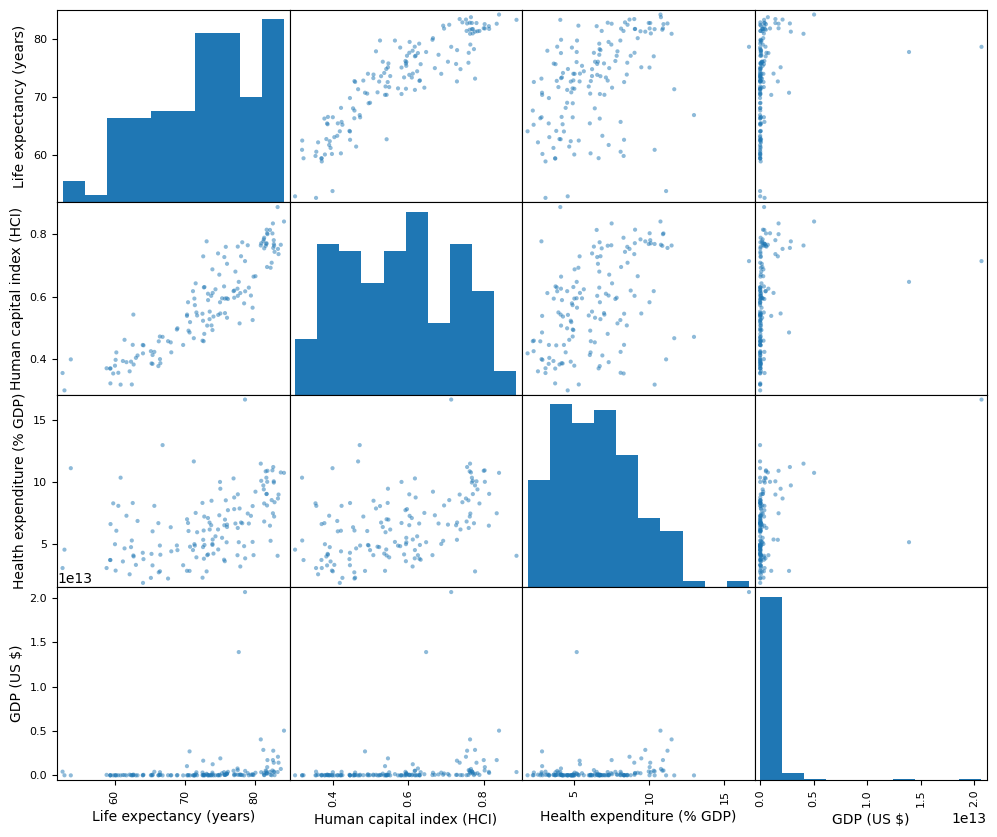

In [147]:
feature_list = [
    'Life expectancy (years)',
    'Human capital index (HCI)',
    'Health expenditure (% GDP)',
    'GDP (US $)',
    ]

scatter_matrix(df_del[feature_list], figsize=(12, 10))
plt.show()

Those relations are better visible in a heatmap.

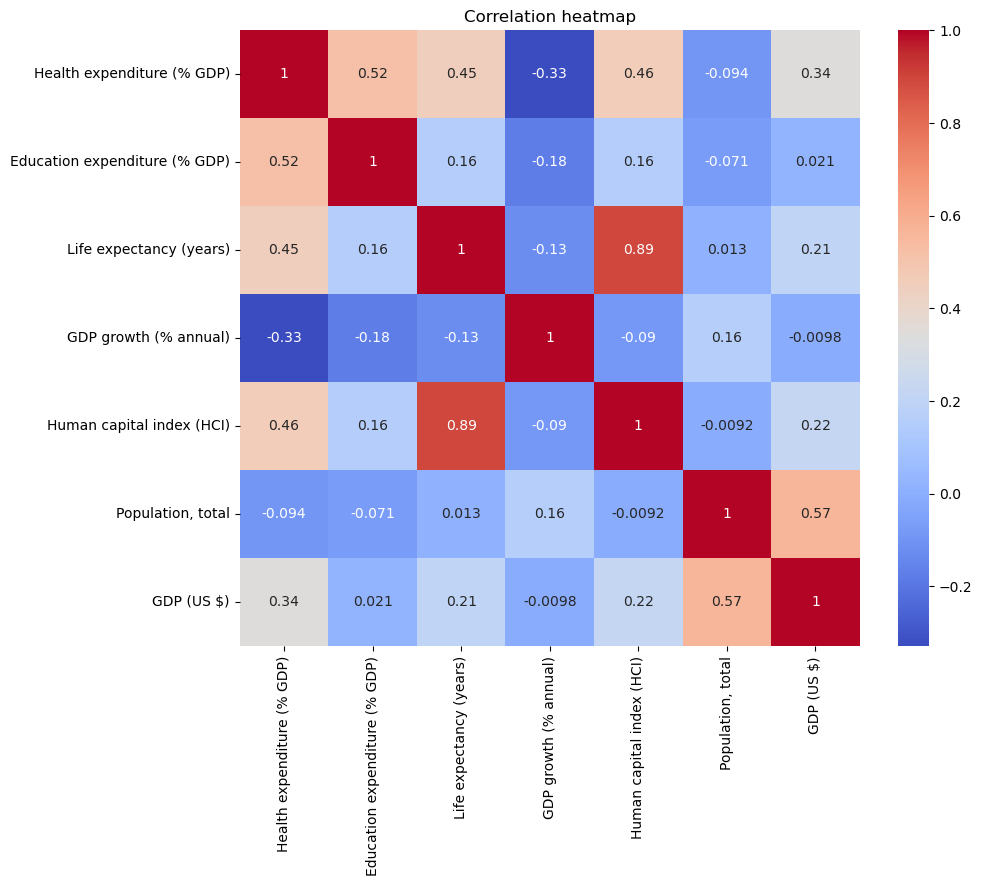

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_del, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

A plot for the correlation between the highest ranked parameter (HCI) and life expectancy.

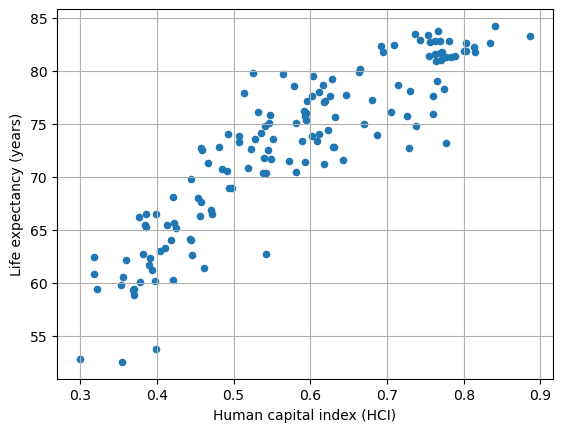

In [153]:
df_del.plot(kind='scatter', x='Human capital index (HCI)', y='Life expectancy (years)', grid=True)
plt.show()

### Explanation

Economic indices are related to the life expectancy. Of course, strength of that relation depends on the parameter taken under consideration. Referring to the data visible above, the highest correlation exists for HCI. There are also 4 other features with a positive sign and significantly lower value. From the heatmap, we can spot visible correlations between other features, like for instance, health and education expenditures. 
By looking at the detailed view of the highest-ranked parameter, it is visible that the figures are strongly related. How can it be revealed? Points are grouped along the invisible line, which is not perpendicular to any of the axes and potentially could match the vast majority of them. 
Relationship values higher than 0,8 are usually called as very strong correlation. In this case, Human Capital Index with a value of 0,89 fulfills that assumption.

## Question 2: How precisely can we estimate the life expectancy using the model's prediction?

### Analyze Data

We base on a multiple linear regression model on the dataset df_del.

What are the predictions of our model compared to the actual values?

In [161]:
pred_values = predictions_test_del.round(0)
print(pred_values)

[79. 80. 77. 75. 60. 82. 63. 63. 65. 71. 60. 64. 75. 82. 77. 69. 73. 73.
 73. 76. 81. 69. 71. 74. 72. 64. 63. 73. 66.]


In [163]:
act_values = y_del_test.values.round(0)
print(act_values)

[82. 83. 75. 76. 53. 82. 66. 63. 60. 74. 62. 67. 73. 83. 74. 73. 70. 71.
 76. 78. 73. 74. 72. 79. 76. 62. 60. 75. 64.]


What are the % relative errors of prediction?

In [166]:
rel_error = relative_errors_del.values.round(2)
print(rel_error)

[ 3.92  3.64  3.09  2.2  13.78  0.42  4.93  0.97  8.54  4.    3.44  4.46
  3.39  0.82  4.42  6.09  3.33  1.64  2.98  2.17 11.34  7.05  0.93  6.86
  5.3   4.56  4.67  2.99  3.  ]


What are the r2 and rmse values for the train and test set?

In [169]:
print(values_del)

(0.8018288494903624, 0.784384179021284, 3.388756995879414, 3.519462965949931)


(r2 train, r2 test, rmse train, rmse test)

### Visualise Data

We can look at prediction and actual values in the chart.

In [174]:
x_axis = range(len(pred_values))

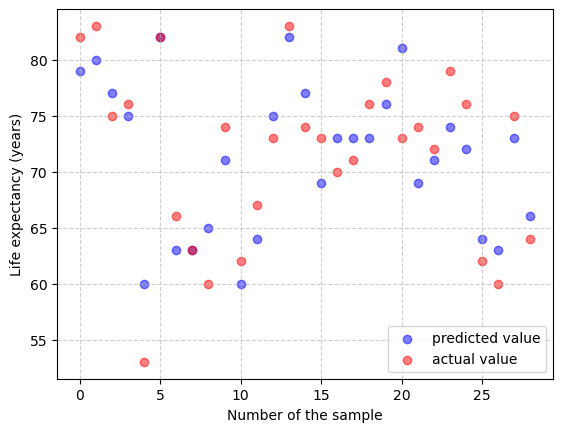

In [176]:
plt.scatter(x_axis, pred_values, color='blue', label='predicted value', alpha=0.5)
plt.scatter(x_axis, act_values, color='red', label='actual value', alpha=0.5)
plt.xlabel('Number of the sample')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

We are also able to see what is the relative error in % for this model.

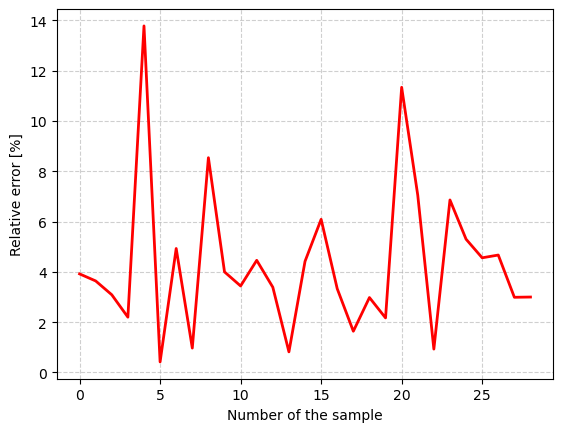

In [179]:
plt.plot(x_axis, rel_error, color='red', linewidth=2)
plt.xlabel('Number of the sample')
plt.ylabel('Relative error [%]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Explanation

By looking at the figures, a multiple regression model delivers reasonable precision of target prediction. For the test set, over 78% of the target variation was explained by the model. RMSE for the test set shows 3.5 years of difference in the prediction of the correct value. 
The scatterplot shows how close are values between predicted and actual. In two cases those values overlap. The chart shows relative error, we can see that it fits in range 0-14%. It does not reach zero in fact, what might be suggested by the scatterplot. The reason is rounding up the values to show "full" years in that first case.

## Question 3: How many features should we take under consideration to predict life expectancy?

### Analyze Data

This part requires a comparison between multiple linear regression model and simple linear regression models with various input.

We compare r2 and rmse values for different types of models.

Multiple regression model (r2 train, r2 test, rmse train, rmse test):

In [188]:
print(values_del)

(0.8018288494903624, 0.784384179021284, 3.388756995879414, 3.519462965949931)


Simple regression model (HCI feature), (r2 train, r2 test, rmse train, rmse test):

In [191]:
print(values_simp1)

(0.7976652335630409, 0.7778683138354765, 3.424171182710538, 3.5722458805731145)


Simple regression model (Health expenditure), (r2 train, r2 test, rmse train, rmse test):

In [194]:
print(values_simp2)

(0.2056709496319229, 0.14647322305221966, 6.784540429020337, 7.002363676653124)


We can look again at the correlations between the target and the chosen feature.

In [197]:
df_del['Life expectancy (years)'].corr(df_del['Human capital index (HCI)'])

0.8915488318718022

In [199]:
df_del['Life expectancy (years)'].corr(df_del['Health expenditure (% GDP)'])

0.44605860072559383

### Visualise Data

First, we look at the comparison of r2 for different models.

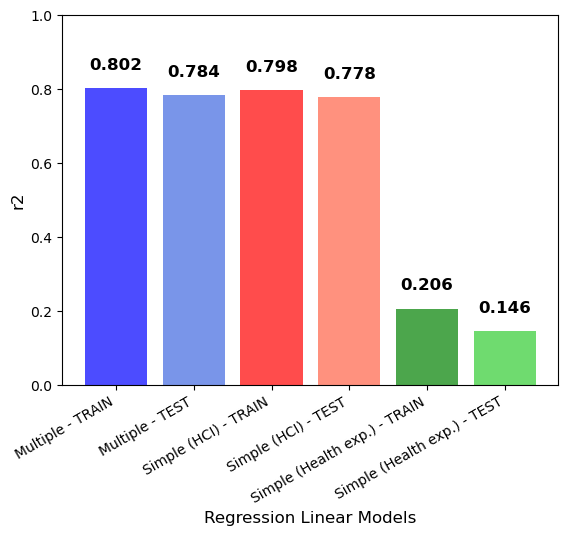

In [203]:
plot_categories = ["Multiple - TRAIN", "Multiple - TEST",
                   "Simple (HCI) - TRAIN", "Simple (HCI) - TEST",
                   "Simple (Health exp.) - TRAIN", "Simple (Health exp.) - TEST"]
plot_r2_values = [round(values_del[0], 3), round(values_del[1], 3),
                  round(values_simp1[0], 3), round(values_simp1[1], 3),
                  round(values_simp2[0], 3), round(values_simp2[1], 3)]
plot_colors = ['blue', 'royalblue', 'red', 'tomato', 'green', 'limegreen']
# Plot bars
plt.bar(plot_categories, plot_r2_values, color=plot_colors, alpha=0.7)
# Add numerical values on top of each bar
for i, v in enumerate(plot_r2_values):
    plt.text(i, v + 0.05, str(v), ha='center', fontsize=12, fontweight='bold') 
# Adjust labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel("Regression Linear Models", fontsize=12)
plt.ylabel("r2", fontsize=12)
plt.ylim(0, 1)
plt.show()

Now, we look at the comparison of rmse for different models.

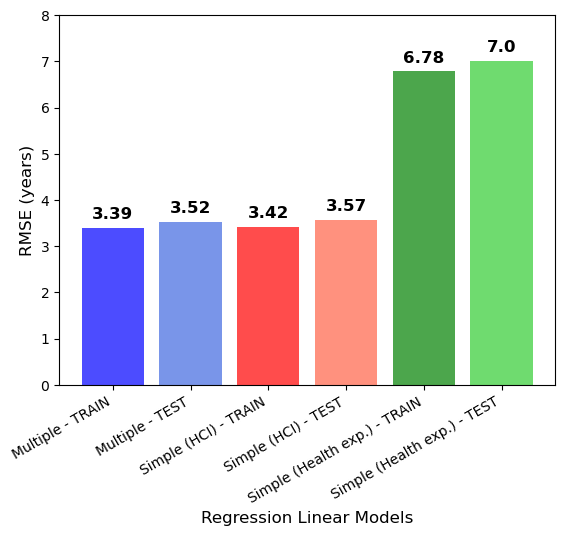

In [206]:
plot_categories = ["Multiple - TRAIN", "Multiple - TEST",
                   "Simple (HCI) - TRAIN", "Simple (HCI) - TEST",
                   "Simple (Health exp.) - TRAIN", "Simple (Health exp.) - TEST"]
plot_rmse_values = [round(values_del[2], 2), round(values_del[3], 2),
                  round(values_simp1[2], 2), round(values_simp1[3], 2),
                  round(values_simp2[2], 2), round(values_simp2[3], 2)]
plot_colors = ['blue', 'royalblue', 'red', 'tomato', 'green', 'limegreen']
# Plot bars
plt.bar(plot_categories, plot_rmse_values, color=plot_colors, alpha=0.7)
# Add numerical values on top of each bar
for i, v in enumerate(plot_rmse_values):
    plt.text(i, v + 0.2, str(v), ha='center', fontsize=12, fontweight='bold') 
# Adjust labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel("Regression Linear Models", fontsize=12)
plt.ylabel("RMSE (years)", fontsize=12)
plt.ylim(0, 8)
plt.show()

For simple models, fit of the prediction to the data can be visualised well. 

Model with feature HCI:

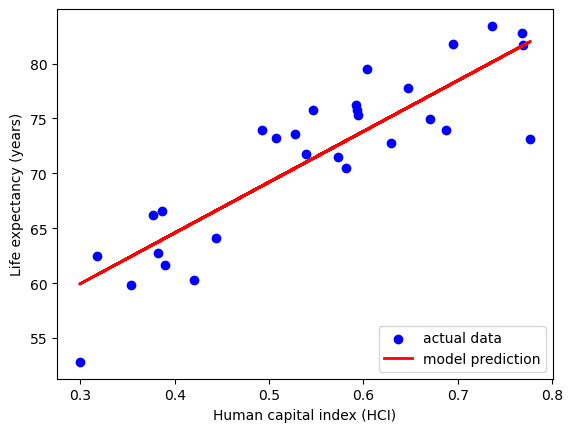

In [210]:
plt.scatter(X_test_HCI, y_del_test, color='blue', label='actual data')
plt.plot(X_test_HCI, predictions_test_simp1, color='red', linewidth=2, label='model prediction')
plt.xlabel('Human capital index (HCI)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()

Model with feature Health expenditure:

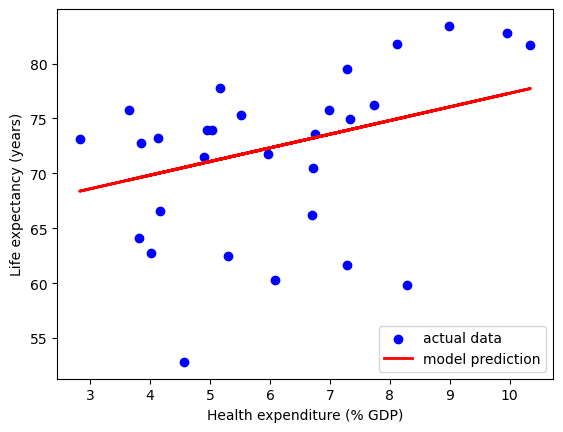

In [213]:
plt.scatter(X_test_Hexp, y_del_test, color='blue', label='actual data')
plt.plot(X_test_Hexp, predictions_test_simp2, color='red', linewidth=2, label='model prediction')
plt.xlabel('Health expenditure (% GDP)')
plt.ylabel('Life expectancy (years)')
plt.legend(loc='lower right')
plt.show()

### Explanation

Answering a raised question is not obvious. A lot more important than the number of chosen features is the correct choice of them. Score r2 is close, but slightly lower for testing than for training set. Values of that parameter are similar for the first two models (multiple features and single with HCI feature) and set close to 0.8. Values for the model with a Health expectancy single feature are totally different, in the range of 0.14 - 0.2. This means that the model performed badly and that the ability to correctly predict the target was lacking. The same dependencies are visible for RMSE score. The first two models offer a prediction accuracy of 3,5 years. The third model delivers twice as much, which means that it cannot predict anything, having an accuracy nearly of a standard deviation for the dataset. Differences between performances of single-feature simple models are huge. The main reason explaining that phenomenon might be the correlation of the features with the target. For HCI it is nearly 0.9, whereas Health expenditure achieves only half of it.
To sum up, in some special cases, where one feature is well correlated with the target, using a simple linear regression model can provide a similar performance to a full-scale multiple one.

## Question 4: How does the handling of missing values in a dataset affect the model's response?

### Analyze Data

In [219]:
df_fil.shape

(209, 7)

In [221]:
df_del.shape

(143, 7)

In the beginning, we can look at the correlation for the feature that initially had a lot of NaN values - HCI.

In [224]:
df_fil['Life expectancy (years)'].corr(df_fil['Human capital index (HCI)']).round(2)

0.81

In [226]:
df_del['Life expectancy (years)'].corr(df_del['Human capital index (HCI)']).round(2)

0.89

Relative errors for models built on two dataframes are presented below. We need to remember that the sizes of dataframes are different, for visual reasons, one of the outputs will be shortened to 29 items.

In [229]:
rel_error_fil = relative_errors_fil[:29].values.round(2)
print(rel_error_fil)

[ 2.85  6.04  1.68  1.54  0.43  2.74  0.09  1.09  1.29  5.85  2.83  5.56
  5.46  7.72 13.81  1.94  2.    4.12  1.93  6.72  3.55  2.4   4.8   1.53
  0.1   2.19  3.82  4.26  3.96]


In [231]:
relative_errors_fil.mean().round(2)

3.7

In [233]:
rel_error_del = relative_errors_del.values.round(2)
print(rel_error_del)

[ 3.92  3.64  3.09  2.2  13.78  0.42  4.93  0.97  8.54  4.    3.44  4.46
  3.39  0.82  4.42  6.09  3.33  1.64  2.98  2.17 11.34  7.05  0.93  6.86
  5.3   4.56  4.67  2.99  3.  ]


In [235]:
rel_error_del.mean().round(2)

4.31

The performance of the models is described by those figures (r2 train, r2 test, rmse train, rmse test):

In [238]:
print(values_fil)

(0.6289387633205068, 0.7680746393126646, 4.70424427291162, 3.2767080074601176)


In [240]:
print(values_del)

(0.8018288494903624, 0.784384179021284, 3.388756995879414, 3.519462965949931)


### Visualise Data

We start with the visualisation of the most correlated feature for both dataframes.

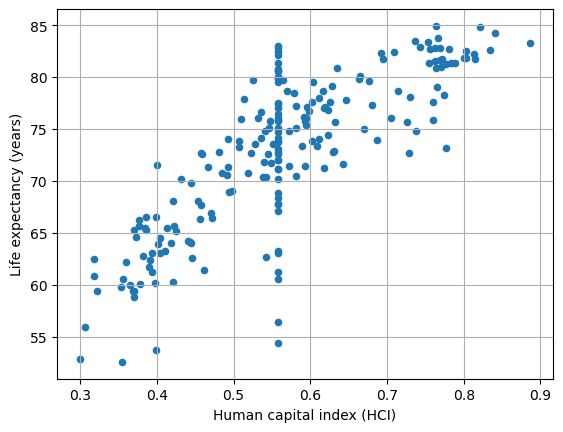

In [244]:
df_fil.plot(kind='scatter', x='Human capital index (HCI)', y='Life expectancy (years)', grid=True)
plt.show()

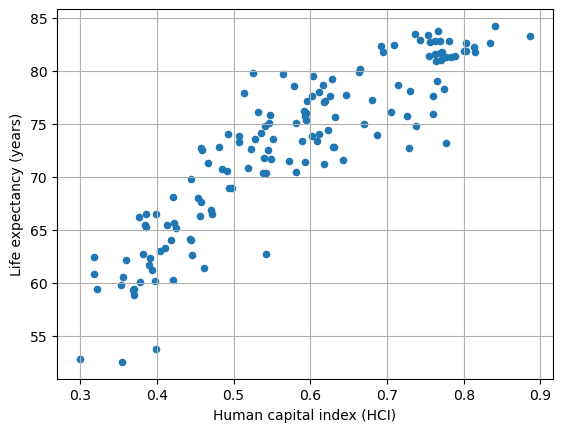

In [246]:
df_del.plot(kind='scatter', x='Human capital index (HCI)', y='Life expectancy (years)', grid=True)
plt.show()

We prepare the visualisation of relative errors, similar to one of the previous questions.

In [249]:
x_axis

range(0, 29)

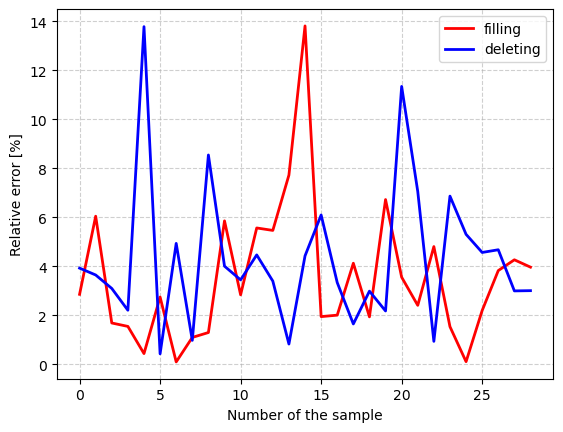

In [251]:
plt.plot(x_axis, rel_error_fil, color='red', linewidth=2, label='filling')
plt.plot(x_axis, rel_error_del, color='blue', linewidth=2, label='deleting')
plt.xlabel('Number of the sample')
plt.ylabel('Relative error [%]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.show()

Now, it's a moment to check what the performance looks like.

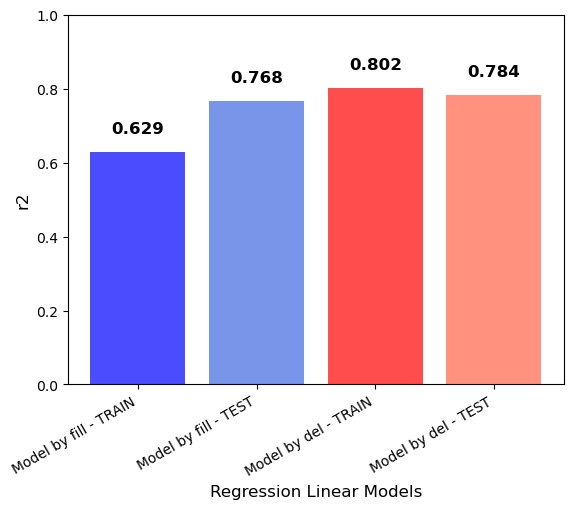

In [254]:
plot_categories_comp = ["Model by fill - TRAIN", "Model by fill - TEST",
                  "Model by del - TRAIN", "Model by del - TEST"]
plot_r2_values_comp = [round(values_fil[0], 3), round(values_fil[1], 3),
                  round(values_del[0], 3), round(values_del[1], 3)]
plot_colors_comp = ['blue', 'royalblue', 'red', 'tomato']
# Plot bars
plt.bar(plot_categories_comp, plot_r2_values_comp, color=plot_colors_comp, alpha=0.7)
# Add numerical values on top of each bar
for i, v in enumerate(plot_r2_values_comp):
    plt.text(i, v + 0.05, str(v), ha='center', fontsize=12, fontweight='bold') 
# Adjust labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel("Regression Linear Models", fontsize=12)
plt.ylabel("r2", fontsize=12)
plt.ylim(0, 1)
plt.show()

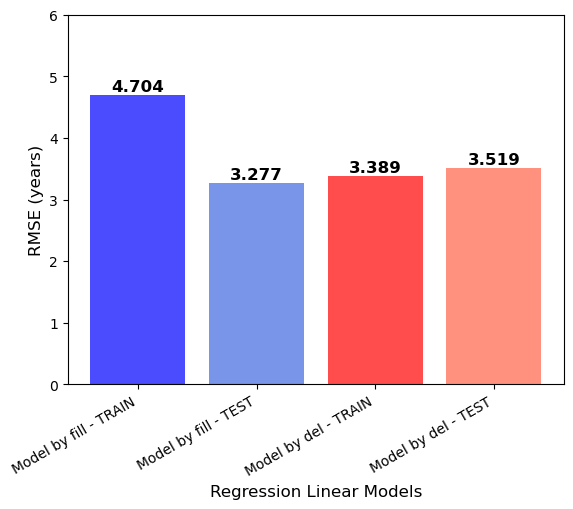

In [256]:
plot_categories_comp = ["Model by fill - TRAIN", "Model by fill - TEST",
                        "Model by del - TRAIN", "Model by del - TEST"]
plot_rmse_values_comp = [round(values_fil[2], 3), round(values_fil[3], 3),
                         round(values_del[2], 3), round(values_del[3], 3)]
plot_colors_comp = ['blue', 'royalblue', 'red', 'tomato']
# Plot bars
plt.bar(plot_categories_comp, plot_rmse_values_comp, color=plot_colors_comp, alpha=0.7)
# Add numerical values on top of each bar
for i, v in enumerate(plot_rmse_values_comp):
    plt.text(i, v + 0.05, str(v), ha='center', fontsize=12, fontweight='bold') 
# Adjust labels
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.xlabel("Regression Linear Models", fontsize=12)
plt.ylabel("RMSE (years)", fontsize=12)
plt.ylim(0, 6)
plt.show()

### Explanation

There are visible differences in working on dataframe prepared by two methods: df_fil - median filling and df_del - NaN deleting. 
Starting with correlation charts, there is a visible, vertical line of points for df_fil. The value of correlation is slightly worse for this dataframe (0.81 vs 0.89). What is interesting, relative errors, being close in values, are minimally worse for df_del (4.31% vs 3.7%). Looking into model performance, df_fil behaved definitely worse for the training set (smaller r2 and higher rmse), but for the test set, the situation was a lot better and very close to df_del. In fact, the lowest rmse value stands for the model based on df_fil (better by 0.2 years). In general, test predictions of the models are equally good with a small advantage for df_del if we look on overall performance and r2 score.
Those statements are valid for the particular project and dataset. In other cases filling method might perform differently, especially if we use a different than median method for filling.

**Report for Evaluation:**

The goal of the project was achieved. Relations between economic indices and life expectancy were analyzed, evaluated and explained. All the questions raised in the beginning were answered based on data analysis and data science CRISP methodology. Targets set in the beginning (finding a feature with correlation to the target greater than 0.7, r2 score higher than 0.8 and rmse being smaller than a half of the target's standard variation) were fulfilled.